<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/inference-with-meta-sam-and-sam2-using-ultralytics-python-package.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Inference with Meta [Segment Anything (SAM)](https://docs.ultralytics.com/models/sam/) using [Ultralytics](https://github.com/ultralytics/ultralytics) [Python Package](https://pypi.org/project/ultralytics/) 🚀 notebook! The Segment Anything Model, or SAM, is a cutting-edge image segmentation model that allows for promptable segmentation, providing unparalleled versatility in image analysis tasks.  We hope that the resources in this notebook will help you get the most out of SAM and SAM2. Please browse the <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Segment Anything Model (SAM)

This notebook serves as a starting point for using the Segment Anything (SAM) or [Segment Anything 2 (SAM2)](https://docs.ultralytics.com/models/sam-2/) model with the [Ultralytics Python Package](https://pypi.org/project/ultralytics/).

## Introduction to SAM and Segment Anything 2

SAM is a groundbreaking project that introduces a novel model, task, and dataset for image segmentation. Its advanced design allows it to adapt to new image distributions and tasks without prior knowledge, a feature known as zero-shot transfer.

- Trained on the expansive SA-1B dataset, which contains more than 1 billion masks spread over 11 million carefully curated images, SAM has displayed impressive zero-shot performance, surpassing previous fully supervised results in many cases.

**[SAM 2](https://docs.ultralytics.com/models/sam-2/#key-features)**, the successor to Meta's Segment Anything Model (SAM), is a cutting-edge tool designed for comprehensive object segmentation in both images and videos. It excels in handling complex visual data through a unified, promptable model architecture that supports real-time processing and zero-shot generalization.

![SAM2 Inference Results](https://github.com/user-attachments/assets/193d69bc-ae6a-43c4-98d6-9d7a4e86aa99)

## Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://clickpy.clickhouse.com/dashboard/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [1]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.205 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


## Segment Everything

Using SAM and SAM2 models, you can [segment](https://docs.ultralytics.com/tasks/segment/) the entire image or video content without specific prompts.

Model summary: 403 layers, 80,850,178 parameters, 80,850,178 gradients

image 1/1 /content/bus.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 14934.5ms
Speed: 70.2ms preprocess, 14934.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


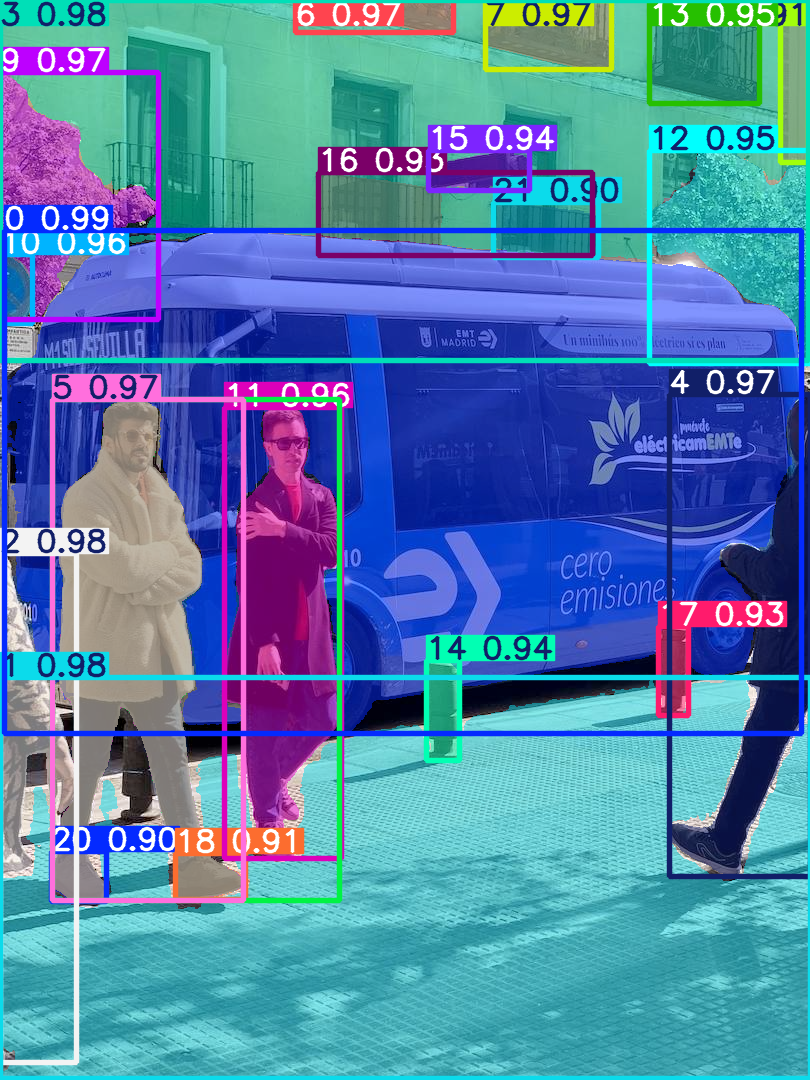

In [2]:
from ultralytics import SAM

# Load a model
# For SAM=sam_b.pt, SAM2=sam2_b.pt, SAM2.1=sam2.1_b.pt
model = SAM("sam2.1_b.pt")

model.info()  # Display model information (optional)

# Run inference (image or video)
results = model("https://ultralytics.com/images/bus.jpg")  # image
# results = model("https://youtu.be/LNwODJXcvt4")  # video file

results[0].show()  # Display results

![Segment everything results](https://github.com/user-attachments/assets/5d00c0e6-42c3-4f23-9975-1340d9b866f5)

## Segment Anything

You can [segment](https://docs.ultralytics.com/tasks/segment/) specific objects in an image or video using different prompts, such as bounding box and point prompts.

### Bounding box prompt

The `bbox_prompt` refers to a bounding box input that guides the model in segmenting a specific object within an image. In the example below, you will segment only the bus by providing the bounding box coordinates.

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Run inference with bboxes prompt (Provide the bounding box coordinates
# for the bus area, ensuring that only bus is segmented in the entire image)
results = model("https://ultralytics.com/images/bus.jpg",
                bboxes=[3.8328723907470703, 229.35601806640625,
                        796.2098999023438, 728.4313354492188])

results[0].show()  # Display results


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 1024x1024 1 0, 334.1ms
Speed: 7.8ms preprocess, 334.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


![Segment anything with bounding box prompt results](https://github.com/user-attachments/assets/4833d1fe-7990-4829-83d9-dc6e43b9d08c)

### Point prompt

The `point_prompt` refers to a specific point input (x, y) that guides the Segment Anything Model (SAM) in segmenting an object within an image. Instead of providing a bounding box, you can indicate an object by selecting a point on it, and SAM will generate a segmentation mask around that point.

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Run inference with point prompt (Provide the point coordinates for the
# person area, ensuring that only the person is segmented in the entire image)
results = model("https://ultralytics.com/images/bus.jpg",
                points=[34, 714])

results[0].show()  # Display results


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 1024x1024 1 0, 312.3ms
Speed: 6.4ms preprocess, 312.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


![Segment anything with point prompt results](https://github.com/user-attachments/assets/fc218266-1e1a-4e31-a0e3-de4de55cb13c)

### Multiple points prompt

Multiple `point_prompt` inputs refer to specific points (x, y) that serve as prompts to guide the Segment Anything Model (SAM) in segmenting multiple objects within an image.

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Run inference with multiple point prompts (Provide the points coordinates for
# person area, ensuring that only the person is segmented in the entire image)
results = model("https://ultralytics.com/images/bus.jpg",
                points=[[34, 714], [283, 634]])

results[0].show()  # Display results


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 1024x1024 1 0, 1 1, 315.8ms
Speed: 7.4ms preprocess, 315.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


![Segment anything with multiple points prompt results](https://github.com/user-attachments/assets/fd7f7d78-f79b-401f-ad03-e129e8dc89dd)

## Auto Annotation using Segment Anything Model

[Auto-annotation](https://docs.ultralytics.com/reference/data/annotator/#ultralytics.data.annotator.auto_annotate) is a core feature of SAM, enabling users to create a segmentation dataset with a pre-trained detection model. It streamlines the annotation process by quickly and accurately labeling large image sets, eliminating the need for labor-intensive manual annotation.

- The example below uses two images from Ultralytics assets for auto-annotation, but you can use your own. Just create a folder, add the images you want to auto-annotate, and pass the folder path to the `auto_annotate` function via the `data` argument.

In [ ]:
from ultralytics.data.annotator import auto_annotate

# Use the Ultralytics sample dataset (You can use your own images)
from ultralytics.utils.downloads import safe_download
images = ["bus.jpg", "zidane.jpg"]
for img in images:
  path = safe_download(f"https://ultralytics.com/assets/{img}", dir="assets")

# return the annotation in the Ultralytics YOLO segmentation format.
# output directory i.e assets_auto_annotate_labels
auto_annotate(data="assets",
              det_model="yolo11x.pt",
              sam_model="sam_b.pt")

100%|██████████| 134k/134k [00:00<00:00, 6.56MB/s]


100%|██████████| 49.2k/49.2k [00:00<00:00, 8.62MB/s]


100%|██████████| 109M/109M [00:00<00:00, 342MB/s]


100%|██████████| 358M/358M [00:01<00:00, 200MB/s]



image 1/2 /content/assets/bus.jpg: 640x480 4 persons, 1 bus, 71.2ms
image 2/2 /content/assets/zidane.jpg: 384x640 2 persons, 3 ties, 33.6ms
Speed: 2.8ms preprocess, 52.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


## Additional Resources  

🔹 Segment Anything 2 Documentation: [📖 Read here](https://docs.ultralytics.com/models/sam-2/)  
🔹 SAM2 Blog: [📝 Explore applications](https://www.ultralytics.com/blog/applications-of-meta-ai-segment-anything-model-2-sam-2)